### 05회귀

* 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향이 있음. ex)사람의 키는 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙
* 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법임. ex) 아파트 방 개수, 방 크기, 주변 학군 등 여러개의 독립 변수에 따라 아파트 가결 이라는 종속 변수가 어떤 관계를 나타내는 지 모델링 하고 에측하는 것.
* Y=W1*X1 + W2*X2 + W3*X3 + .. + Wn*Xn  Y는 종속변수, X1, X2, X3은 방개수, 방크기, 주변 학군 등의 독립변수를 의미하고 W1, W2, W3은 독립변수의 값에 영향을 미치는 회귀계수를 의미함. 기본이 Y=w0+ W1*X1
* 회귀는 계수의 선형/비선형 여부에 따라 독립변수의 개수에 따라( 단일/ 다중 회귀), 종속변수의 개수에 따라 여러 유형으로 나눌 수 있음.
* 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 `최적의 회귀 계수`를 찾아내는 것임

+) 독립변수는 피처, 종속변수는 결정값

+) 지도학습은 분류와 회귀로 나뉨. 이 둘의 가장 큰 차이점은 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자값이라는 점.


#### 선형회귀
* 회귀중 선형 회귀가 가장 많이 사용됨, 선형회귀는 (실제값-예측값)=오류의 제곱값 을 최소화 하는 직선형 회귀선을 최적화 하는 방식.
*선형회귀는 모델 규제방법에 따라 다시 별도의 유형으로 나뉠 수 있음. 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페털티 값을 적용하는 것을 말함.
* 대표적인 선형 회귀 모델
  * 일반 선형 회귀 
  * 릿지
  * 라쏘
  * 엘라스틱넷
  * 로지스틱 회귀
  

* 단순 선형 회귀: 독립변수가 1개인 단순 선형 회귀에서는 이 기울기 W1과 절편 W0을 회귀계수로 지칭함.

#### RSS(=오류 합)=시그마 i부터 n * 1/n * (yi-(w0+w1*xi))^2 =시그마 i부터 n * 1/n * 잔차^2

+) 잔차란 실제 값과 회귀모델의 차이에 따른 오류 값을 남은 오류임. 잔차의 합이 최소가 되는것이 최적의 회귀 모델을 찾는 다는 거임(최적의 회귀계수 찾기)

* RSS을 계산할 때는 절댓값을 취해서 더하거나 오류값의 제곱을 구해서 더하는 방식을 취함.
* `RSS는 회귀식의 독립변수나 종속변수가 중심이 아니라 W 변수, 즉 회귀계수가 중심 변수임을 인지하는 것이 매우 중요함. 나머지 둘은 상수 취급`
* 회귀에서 RSS는 비용이며 W변수(회귀 계수)로 구성되는 RSS를 비용함수라 함. 비용함수를 손실함수 라고 하기도 함.

#### 어떻게 비용함수가 최소가 되는 W파라미터를 구할 수 있을까?(=rss가 최소가 되는 회귀계수 어케 구할까?)

* 경사하강법: 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식 (더 이상 오류가 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때 W값을 최적 파라미터로 반환) - 말이 좋아 경사하강법이지 존나 당연한거,,
* w파라미터로 이뤄진 함수(비용함수)를 미분하여 미분 함수의 최솟값을 구해야 하는데 이떄 변수가 두개 이상이면 (w0, w1..) 편미분을 적용해 준다-> 이러면 편미분 결과 값으로 나온 두개를 최솟값으로 업데이트 하면서 비용함수가 최소가 되는 w0, w1를 구할수 있음
* 예를 들어 2차함수면, 경사하강법은 최초 w에서부터 미분을 적용한 한 뒤 이 미분값이 계속 감소하는 방향으로 순차적으로 w를 업데이터 함.

#### 정리
* rss를 w로 미분해서 나오는 최솟값을 구해야하고 이때의 w값이 회귀계수
* w1= 이전 w1 + 편미분한 값* 학습률(보정값)
* 예측값은 w0 + x1*w1 + x2*w2...
* 경사하강법으로 예측값을 구하고 이때의 회귀계수도 구함. 이거를 여러번 해서 업데이트 시켜주는 거임.

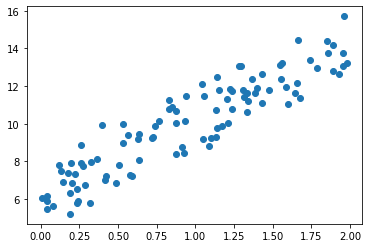

In [27]:
# 간단 회귀식 y=4*x + 6을 근사하기 위한 100개의 데이터 셋 만들고, 이걸 경사하강법 써서 w1, w0 도출해보기

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬  
# 잡음(noise)이란 측정된 변수에 무작위의 오류 또는 분산이 존재하는 것을 말함.
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [22]:
# rss를 계산하는 비용함수 get_cost(). 나중에 경사 하강법으로 y예측값 구하고 비용함수로 rss계산할거임.

def get_cost(y,y_pred):   
    cost=np.sum(np.square(y-y_pred))/N  # square가 제곱
    N=len(y) 
    return cost

* 경사 하강법을 gradient_descent()라는 함수를 생성해 구현해 보자 (무작위로 생성한 x, y값 입력받음)

In [29]:
# 경사하강법으로 rss구하기

# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):  # learning_rate 기울기에 따른 학습률
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1) # np.zeros : 0으로 가득찬 Array를 배출
    w0_update = np.zeros_like(w0) # np.zeros_like : 어떤 변수만큼의 사이즈인 0 으로 가득 찬 Array를 배출
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred=np.dot(X, w1.T) + w0   # np.dot은 X, w1.T(w1의 전치)의 내적
                                  # 1w1 + x2w2 + x3w3 같이 계산하기 위해 전치시킴. 변수가 하나면 전치 안시켜도 상관없지만
                                  # 보통은 변수가 여러개 이기에 전치 과정이 필요함.
    diff = y-y_pred 
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1)) #N행 ,1열로 값이 1인 배열 생성

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

?`0으로 초기화 하는 이유를 몰게쑴,,ㅠ`

In [24]:
# 위 함수(get_weight_updates)를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수(gradient_descent_steps)를 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters): 
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

?`여기도 0으로 왜 초기화 시키지..? 코드 이해x`

?`잔차가 작으면 업데이트 하는건데 여기서의 업데이트 기준은 머임?`

?`ind 얜 뭐야`

In [25]:
# gradient_descent_steps()를 호출해 w1과 w0구해보기

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


?`w1[0,0], w0[0,0] 이 위치가 최적 회귀계수인거 어케앎?`

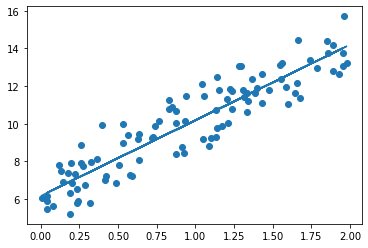

In [26]:
# 회귀선 그려보기
plt.scatter(X, y)
plt.plot(X,y_pred)

+) 확률적 경사하강법은 시간이 덜 걸려서 이걸로 많이 이용함. 근데 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되기에 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장함. 따라서 대용량의 데이터 경우 대부분 확률적 경사하강법이나 미니 배치 확률적 경사하강법을 이용해 최적 비용함수를 도출함. 

* (미니배치) 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현해 보자
   * gradient_descent_steps()와 비슷 하고, x,y 데이터에서 랜덤하게 batch_size만큼 추출해 w값 계산하는 것만 다름

In [32]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [37]:
# 위에서 만들어진걸로 w1, w0 및 예측 오류비용 계산하기

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


* 지금까지 피처가 1개, 즉 독립변수가 1개인 단순 선형 회귀에서 경사 하강법을 적용해보. 만약 피처가 여러개인 경우레는 어떻게 회귀계수를 도출할 수 있을까? 음 피처가 m개 있다면 회귀계수도 m + 1개(1개는 w0)로 도출됨. 즉, y-hat= w0 + w1*x1 +...+ w100*x100

#### 보스턴 주택 가격 예측

In [44]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

SyntaxError: invalid syntax (263906781.py, line 1)